# Taxi rides analysis for 'Zuber'

- We're going to understand passenger preferences and the impact of external factors on rides.
- We'll:
     
    - analyze data from taxi companies, and 
    - test a hypothesis about the impact of weather on ride frequency. 
- Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays    

## Step 1. Exploratory data analysis (Python)

We have these two CSVs:
- __project_sql_result_01.csv__ 

It contains the following data:
    - company_name: taxi company name
    - trips_amount: the number of rides for each taxi company on November 15-16, 2017.

- __project_sql_result_04.csv__. 

It contains the following data:
    - dropoff_location_name: Chicago neighborhoods where rides ended
    - average_trips: the average number of rides that ended in each neighborhood in November 2017.

For these two datasets we need to:

- import the files
- study the data they contain
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

In [1]:
import pandas as pd
from scipy import stats as st

In [2]:
company_trips = pd.read_csv('project_sql_result_01.csv')

company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
company_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [5]:
company_trips.duplicated().sum()

0

In [6]:
loc_trips = pd.read_csv('project_sql_result_04.csv')
loc_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
loc_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
loc_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
loc_trips.duplicated().sum()

0

In [10]:
# TOP 10 locations in terms of dropoffs
top10 = loc_trips.sort_values('average_trips', ascending=False).head(10)
top10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


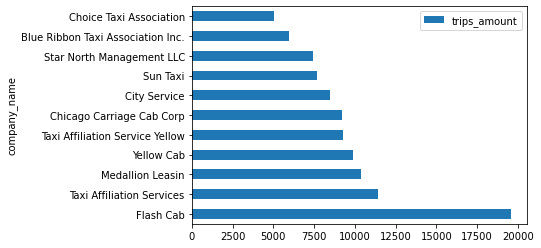

In [13]:
company_trips.loc[:10].plot.barh( x='company_name')

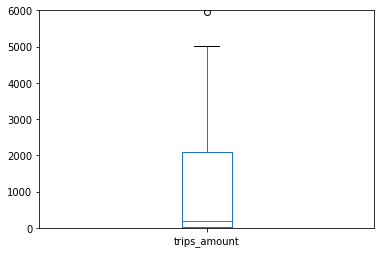

In [8]:
company_trips.plot(kind='box', ylim=(0,6000))

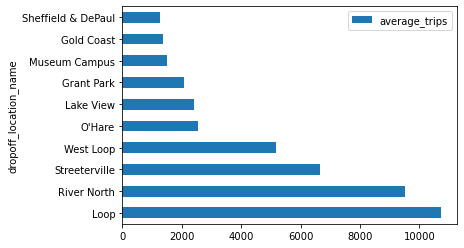

In [14]:
top10.plot.barh( x='dropoff_location_name')

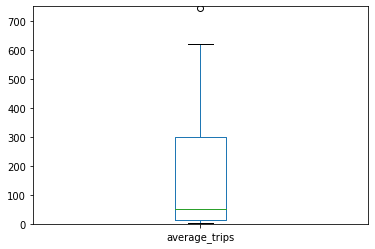

In [10]:
loc_trips.plot(kind='box', ylim=(0, 750))

## Conclusions

- Both datasets have no null values or duplicates
- Data types are correct: string for the names, int64 for the number of trips and float64 for average # of trips
- Both datasets are sufficiently skewed to the right: the median values are low but 3Qs are several times higher. This means that there're a lot of small companies making a few trips as well as there're a lot of big companies making sufficiently more rides. Similarly there're many unpopular dropoff places as well as there're many frequently targeted places.
- The biggest companies are:
    - Flash Cab (~20K rides)
    - Taxi Affiliation Services (~10K rides)
    - Medallion Leasing (~10K rides)
    - Yellow Cab (~10K rides)
    - Taxi Affiliation Service Yellow (~10K rides)
- Flash Cab makes 2 times more rides than other top companies, it seems he's a leader in the industry.
- The most popular dropoff places:
    - Loop (~10K av. trips)
    - River North 	(~10K av. trips)
    - Streeterville (~6-7K av. trips)
    - West Loop 	(~5K av. trips)
    - O'Hare 	(~2.5K av. trips)
    - Lake View (~2.5K av. trips)
    - Grant Park (~2K av. trips)
- Loop and River North are the most popular dropoff places exceeding other top places 1.5 and more times.
- O'Hare is among top 5 dropoff places: it 2 times less popular than the previous place and 4 times less popular than the leaders. 

## Step 2. Testing hypotheses (Python)


__/datasets/project_sql_result_07.csv__ — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:

    start_ts
        pickup date and time
    weather_conditions
        weather conditions at the moment the ride started
    duration_seconds
        ride duration in seconds

Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Let's set the significance level (alpha) to typical value of 0.05.

The null hypothesis is as follows:

$H_0$: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

and the alternative:

$H_1$: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


In [15]:
weather_duration = pd.read_csv('project_sql_result_07.csv')
weather_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
weather_duration.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [17]:
weather_duration.duplicated().sum()

197

The duplicates of trip duration are possible for different trips between the same places so let's keep them.

In [22]:
weather_duration.query('weather_conditions == "Good"')['duration_seconds'].describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [23]:
weather_duration.query('weather_conditions == "Bad"')['duration_seconds'].describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

The bad weather conditions seem to increase the average trip duration. At the same time the deviations are close to each other.

Let's apply the t-test for independent samples to make a decision (assuming equal variances). As trips are not paired between _good_ and _bad_ weather conditions (different companies make rides during different hours so there's no pure experiment conditions, no equally paired trips before and after "rain experiment").

In [29]:
alpha = 0.05

good_weather = weather_duration.query('weather_conditions == "Good"')['duration_seconds']
bad_weather =  weather_duration.query('weather_conditions == "Bad"')['duration_seconds']

result = st.ttest_ind(good_weather.array, bad_weather.array)
print('p-value: ', result.pvalue)
if result.pvalue < alpha:
    print('p-value is below significance level, so we have to reject the null hypothesis!')
else:
    print('p-value is above significance level, so we do not reject the null hypothesis!')

p-value:  6.517970327099473e-12
p-value is below significance level, so we have to reject the null hypothesis!


## Conclusion

We have to reject the null hypothesis in favour to the alternative:

$H_1$: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

So we can conclude the following for Zuber:

1. The customers usually target the following TOP10 places:

    - Loop 	
    - River North 
    - Streeterville
    - West Loop
    - O'Hare
    - Lake View
    - Grant Park
    - Museum Campus
    - Gold Coast
    - Sheffield & DePaul

So Zuber should first cover these areas when launching.

2. Our test on weather conditions showed that average trip duration highly likely changes on rainy Saturdays. It corresponds to the common sense: precipitations usually make road conditions worse so the average speed usually is lower during rains compared to sunny conditions.
It should be taken into account when making forecasts for the trip duration in Zuber app.